<a href="https://colab.research.google.com/github/subha9542/Datamining/blob/master/Datamining_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
 
X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
#X = np.array([[12,39],[20,36],[28,30],[18,52],[29,54],[33,46],[24,55],[45,59],[45,63],[52,70],[55,58]])
 
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=3):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
 
    def fit(self,data):        
        #self.centroids = {}
 
        #for i in range(self.k):
        #    self.centroids[i] = data[i]
        self.centroids = {0:[8, 4], 1: [5, 8],2:[1, 2]}
        #self.centroids = {0:[7, 4.333333], 1: [3.6666, 9],2:[1.5, 3.5]}
        for i in range(self.max_iter):
            print('Centroids are:',self.centroids)
            self.classifications = {}
 
            for i in range(self.k):
                self.classifications[i] = []
 
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid],ord = 2) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
 
            prev_centroids = dict(self.centroids)
 
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
              
            print('Classifications based on centroids are:',self.classifications)
 
 
 
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
 
clf = K_Means()
clf.fit(X)


Centroids are: {0: [8, 4], 1: [5, 8], 2: [1, 2]}
Classifications based on centroids are: {0: [array([8, 4]), array([7, 5]), array([6, 4])], 1: [array([ 2, 10]), array([5, 8]), array([4, 9])], 2: [array([2, 5]), array([1, 2])]}
Centroids are: {0: array([7.        , 4.33333333]), 1: array([3.66666667, 9.        ]), 2: array([1.5, 3.5])}
Classifications based on centroids are: {0: [array([8, 4]), array([7, 5]), array([6, 4])], 1: [array([ 2, 10]), array([5, 8]), array([4, 9])], 2: [array([2, 5]), array([1, 2])]}
Centroids are: {0: array([7.        , 4.33333333]), 1: array([3.66666667, 9.        ]), 2: array([1.5, 3.5])}
Classifications based on centroids are: {0: [array([8, 4]), array([7, 5]), array([6, 4])], 1: [array([ 2, 10]), array([5, 8]), array([4, 9])], 2: [array([2, 5]), array([1, 2])]}


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

medoids_initial  = np.array([[2, 5], [5, 8], [1, 2]])
datapoints = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
data = pd.DataFrame(datapoints)

def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided, 
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p

    return S
  
S = compute_d_p(datapoints, medoids_initial, 2)


def assign_labels(S):
    return np.argmin(S, axis=1)
  
labels = assign_labels(S)

def update_medoids(X, medoids, p):
    
    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)
        
    out_medoids = medoids
                
    for i in set(labels):
        
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))

        cluster_points = datapoints[labels == i]
        
        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity= np.sum(compute_d_p(datapoints, datap, p))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
    return out_medoids

def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])
  
#Full algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=1):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids,labels)

results = kmedoids(datapoints, 3, 2,medoids_initial)
final_medoids = results[0]
data['clusters'] = results[1]
print('Medoids are:',results)
data

Medoids are: (array([[6, 4],
       [5, 8],
       [1, 2]]), array([1, 0, 1, 1, 1, 0, 2, 1]))


,0,1,clusters
0,2,10,1
1,2,5,0
2,8,4,1
3,5,8,1
4,7,5,1
5,6,4,0
6,1,2,2
7,4,9,1


Columns:  ['A', 'B']
Clusters:  2
Centroids: [[ 4.80735704 -9.57610961]
 [-4.66378837 -1.81697795]]


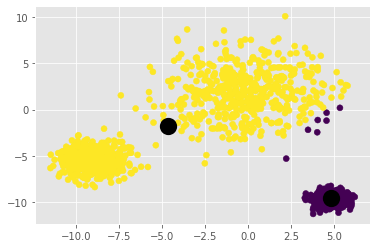

Columns:  ['A', 'B']
Clusters:  3
Centroids: [[-8.9580931  -5.44506208]
 [ 4.81295946 -9.67661098]
 [-0.12876284  1.92943476]]


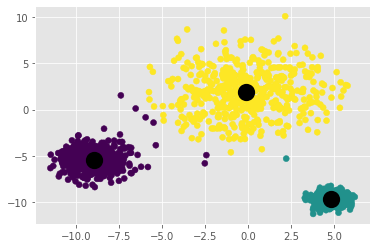

Columns:  ['A', 'B']
Clusters:  4
Centroids: [[ 0.52585093  3.69373858]
 [ 4.81295946 -9.67661098]
 [-9.00487786 -5.48768859]
 [-0.97429454 -0.11011967]]


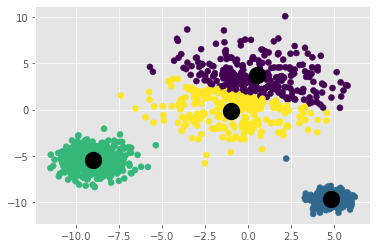

Columns:  ['A', 'B']
Clusters:  5
Centroids: [[-1.35788215 -0.5591736 ]
 [ 4.81295946 -9.67661098]
 [-9.00487786 -5.48768859]
 [-1.37704626  3.97740994]
 [ 2.42211238  2.19611881]]


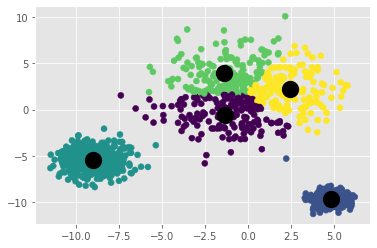

Columns:  ['A', 'B']
Clusters:  6
Centroids: [[-1.01968699 -1.11441965]
 [-9.00487786 -5.48768859]
 [ 4.81295946 -9.67661098]
 [-2.13817765  2.68725241]
 [ 2.34190141  1.73407166]
 [ 0.54198408  5.47972231]]


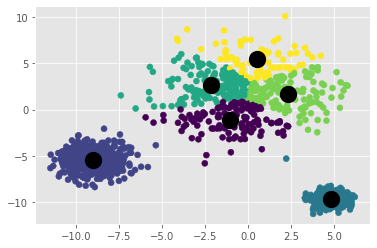

Columns:  ['A', 'C']
Clusters:  2
Centroids: [[ 3.3619508   6.24748011]
 [-6.9321289  -3.58713653]]


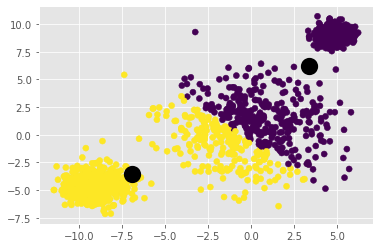

Columns:  ['A', 'C']
Clusters:  3
Centroids: [[ 4.76112305  8.92177206]
 [-8.9818339  -4.59452842]
 [-0.19576193  0.45889556]]


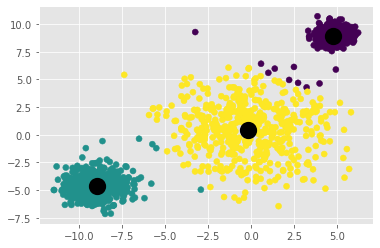

Columns:  ['A', 'C']
Clusters:  4
Centroids: [[ 1.28604085 -0.98222878]
 [-9.00029263 -4.60124451]
 [ 4.78435815  8.92762731]
 [-1.59004855  1.80436045]]


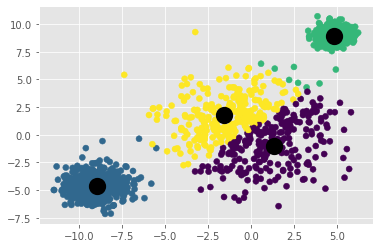

Columns:  ['A', 'C']
Clusters:  5
Centroids: [[-2.69932249  1.06149061]
 [-9.01216564 -4.61649787]
 [ 4.7975967   8.97331196]
 [ 1.29273074  2.14528835]
 [ 0.54327651 -2.28041361]]


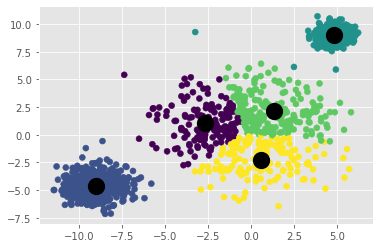

Columns:  ['A', 'C']
Clusters:  6
Centroids: [[-2.49438967e+00 -3.86279595e-04]
 [ 4.81365920e+00  8.97270797e+00]
 [-9.01216564e+00 -4.61649787e+00]
 [ 2.20753422e+00  1.28138219e+00]
 [ 8.58274702e-01 -2.70024817e+00]
 [-9.62258790e-01  3.25169476e+00]]


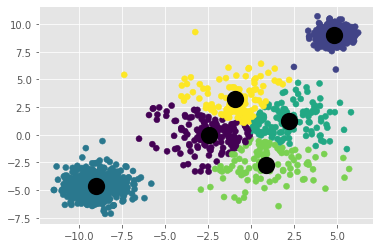

Columns:  ['A', 'D']
Clusters:  2
Centroids: [[-8.35949733  0.12739965]
 [ 2.80062583  1.53937433]]


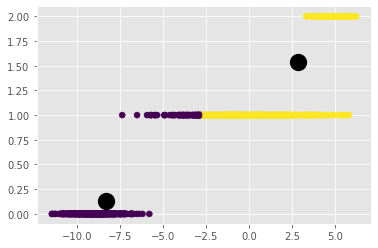

Columns:  ['A', 'D']
Clusters:  3
Centroids: [[-8.95099843  0.01960784]
 [ 4.5612685   1.8361204 ]
 [-0.90928876  1.        ]]


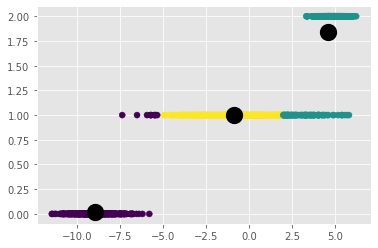

Columns:  ['A', 'D']
Clusters:  4
Centroids: [[-8.99793905e+00  5.96421471e-03]
 [ 4.72609908e+00  1.89766607e+00]
 [ 7.32997141e-01  1.00000000e+00]
 [-2.41247971e+00  1.00000000e+00]]


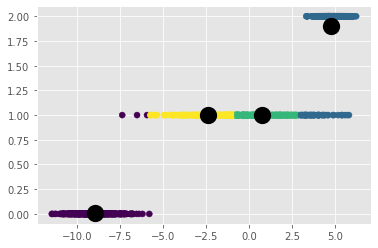

Columns:  ['A', 'D']
Clusters:  5
Centroids: [[ 4.72944364  1.89928058]
 [-8.01542063  0.04524887]
 [-2.12060987  1.        ]
 [ 0.90209055  1.        ]
 [-9.66644029  0.        ]]


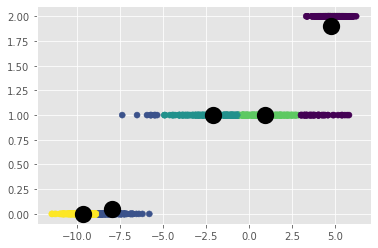

Columns:  ['A', 'D']
Clusters:  6
Centroids: [[-8.18248742  0.0125    ]
 [ 4.77770533  1.92764378]
 [-0.62255011  1.        ]
 [ 1.83184056  1.        ]
 [-3.27437592  1.        ]
 [-9.74207742  0.        ]]


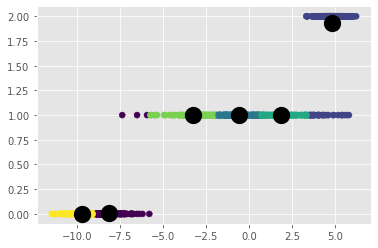

Columns:  ['B', 'C']
Clusters:  2
Centroids: [[-9.67220202  8.98514906]
 [-1.81538885 -2.04612113]]


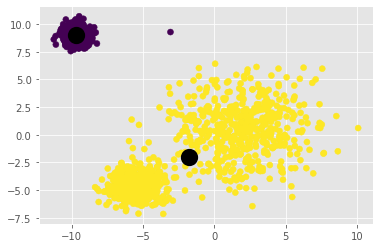

Columns:  ['B', 'C']
Clusters:  3
Centroids: [[ 2.04241405  0.64406292]
 [-9.67220202  8.98514906]
 [-5.3976344  -4.54414918]]


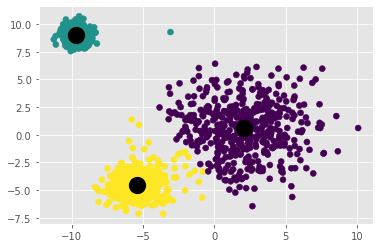

Columns:  ['B', 'C']
Clusters:  4
Centroids: [[-9.67220202  8.98514906]
 [-5.44651282 -4.5849859 ]
 [ 3.96825155  1.09825718]
 [ 0.13951847  0.14617889]]


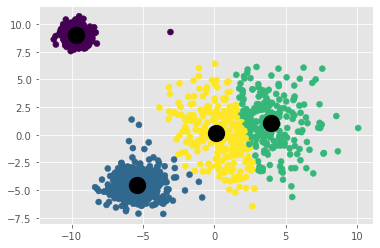

Columns:  ['B', 'C']
Clusters:  5
Centroids: [[-5.45671062 -4.59178383]
 [-9.67220202  8.98514906]
 [-0.55260084  1.50819154]
 [ 2.14687528 -2.22774697]
 [ 3.89810418  1.85884039]]


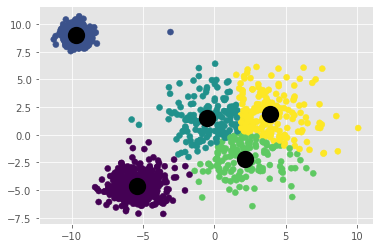

Columns:  ['B', 'C']
Clusters:  6
Centroids: [[ 5.04878395 -0.83667396]
 [-9.67220202  8.98514906]
 [-5.47079153 -4.59718494]
 [-0.7924216   1.66493869]
 [ 1.12873624 -2.12219328]
 [ 3.19336746  2.45519979]]


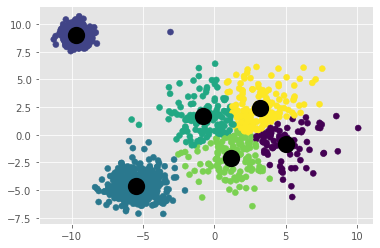

Columns:  ['B', 'D']
Clusters:  2
Centroids: [[-7.53713519  1.00197239]
 [ 2.02326832  0.99588477]]


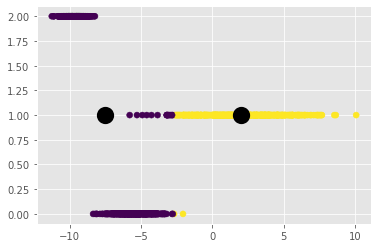

Columns:  ['B', 'D']
Clusters:  3
Centroids: [[-9.67006963  1.98019802]
 [ 2.33933865  1.        ]
 [-5.20405009  0.09007353]]


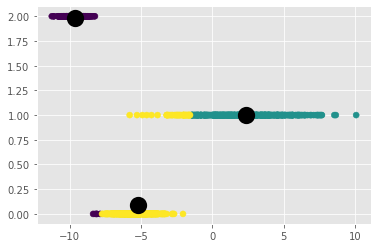

Columns:  ['B', 'D']
Clusters:  4
Centroids: [[-9.67361092  1.98412698]
 [ 4.03685547  1.        ]
 [-5.42043753  0.03131115]
 [ 0.22556882  0.99607843]]


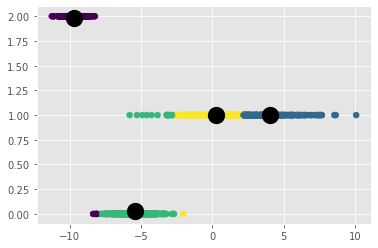

Columns:  ['B', 'D']
Clusters:  5
Centroids: [[-5.48403488  0.01204819]
 [ 1.91286534  1.        ]
 [-9.67361092  1.98412698]
 [ 4.90816757  1.        ]
 [-1.05721458  0.97183099]]


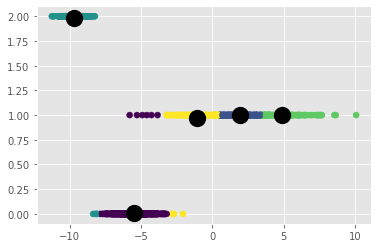

Columns:  ['B', 'D']
Clusters:  6
Centroids: [[ 2.25265262e+00  1.00000000e+00]
 [-6.27367480e+00  3.86100386e-03]
 [-9.68538026e+00  2.00000000e+00]
 [-6.48470337e-01  9.93377483e-01]
 [ 5.23940805e+00  1.00000000e+00]
 [-4.60067024e+00  5.85937500e-02]]


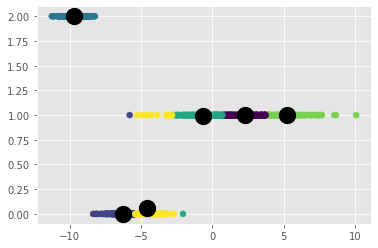

Columns:  ['C', 'D']
Clusters:  2
Centroids: [[-2.54445536  0.4600432 ]
 [ 8.3861504   1.87108014]]


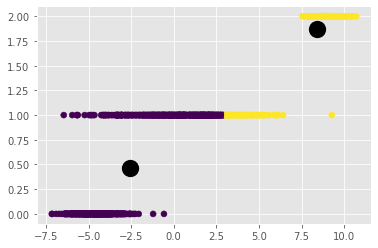

Columns:  ['C', 'D']
Clusters:  3
Centroids: [[-4.40463508  0.15449915]
 [ 8.89563186  1.97087379]
 [ 1.18829375  0.99494949]]


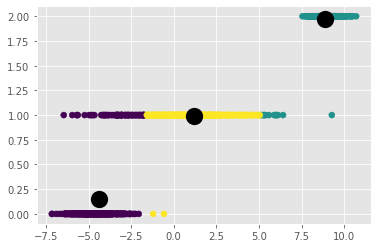

Columns:  ['C', 'D']
Clusters:  4
Centroids: [[ 2.59859541  1.        ]
 [-4.53776334  0.11131059]
 [ 8.94491516  1.98425197]
 [-0.46534708  0.97777778]]


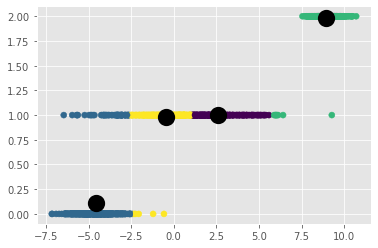

Columns:  ['C', 'D']
Clusters:  5
Centroids: [[-5.17157664  0.03374233]
 [ 8.95093881  1.98619329]
 [ 2.75597351  1.        ]
 [-3.52659895  0.27380952]
 [-0.15762915  0.99103139]]


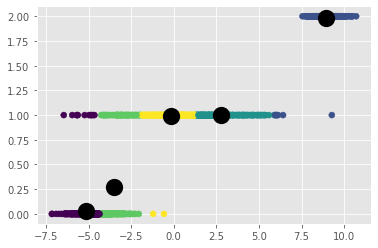

Columns:  ['C', 'D']
Clusters:  6
Centroids: [[-3.64113639  0.22692308]
 [ 8.98514906  1.99800399]
 [ 1.63791932  1.        ]
 [ 4.2752144   1.        ]
 [-5.21735906  0.03571429]
 [-0.66325659  0.98816568]]


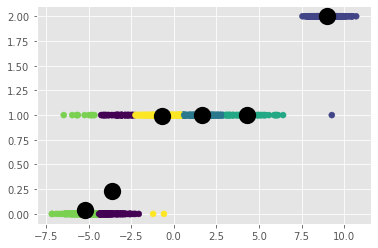

In [3]:
import itertools
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

def Extract(lst,i): 
    return [item[i] for item in lst] 

df = pd.read_csv('hwk08.csv')
colors = 10*["g","r","c","b","k"]

all = itertools.combinations(['A','B','C','D'], 2)
#print(list(all))

for pairs in list(all):
    pairs = list(pairs)
    for k in range(2,7):
        print('Columns: ',pairs)
        print('Clusters: ', k)
        kmeans = KMeans(n_clusters=k)
        fit = kmeans.fit_predict(df[pairs])
        labels = kmeans.predict(df[pairs])
        centroid = kmeans.cluster_centers_
        print('Centroids:',centroid)
        
        plt.scatter(df[pairs[0]],df[pairs[1]],c = fit)
        plt.scatter(Extract(centroid,0), Extract(centroid,1), marker="o", color="k", s=150, linewidths=5)
        plt.show()